In [1]:
spaceList = ['Mediteranian Ave','Community Chest #1','Baltic Ave','Income Tax','Reading RR','Oriental Ave','Chance #1','Vermont Ave','Connecticut Ave','Jail',
            'St. Charles Place','Electric Company','States Ave','Virginia Ave','Pennsylvania RR','St. James Place','Community Chest #2','Tennessee Ave','New York Ave','Free Parking',
            'Kentucky Ave','Chance #2','Indiana Ave','Illinois Ave','B&O RR','Atlantic Ave','Ventnor Ave','Water Works','Marvin Gardens','Go To Jail',
            'Pacific Ave','North Carolina Ave','Community Chest #3','Pennsylvania Ave','Short Line RR','Chance #3','Park Place','Luxury Tax','Boardwalk','Go']

In [2]:
# Import numpy
import numpy as np

def landOnChance(counter):
    # Randomly generate a chance card to pull from the remaining cards in the chance card pile
    chanceCardCount = len(chanceList)
    chanceCardNum = np.random.randint(low = 0, high = chanceCardCount, size = 1)
    chanceCard = chanceCardNum[0]
    
    counter = counter
    
    # Reset jail counter
    jailCounter = 0
    
    if chanceList[chanceCard] == 0:
        # Advance to Go
        counter = 39
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 1:
        # Advance to Illinois
        counter = 23
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 2:
        # Advance to St. Chalres Place
        counter = 10
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 3 and (counter == 6 or counter == 35):
        # Advance to nearest utility (Electric Company)
        counter = 11
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 3 and counter == 21:
         # Advance to nearest utility (Water Works)
        counter = 27
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 4 and counter == 6:
        # Advance to nearest railroad (Pensylvania RR)
        counter = 14
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 4 and counter == 21:
        # Advance to nearest railroad (B&O RR)
        counter = 24
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 4 and counter == 35:
        # Advance to nearest railroad Reading RR)
        counter = 4
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 7 and counter == 6:
        # Go back three spaces to Income Tax
        counter = 3
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 7 and counter == 21:
        # Go back three spaces to New York Ave
        counter = 18
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 7 and counter == 35:
        # Go back three spaces to Community Chest 3
        counter = 32
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 8:
        # Go directly to jail
        counter = 9
        #Player was sent to jail
        jailCounter = 1
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 11:
        # Take a trip on the Reading RR
        counter = 4
        # Remove the card from the deck
        del chanceList[chanceCard]
    elif chanceList[chanceCard] == 12:
        # Advance to Boardwalk
        counter = 38
        # Remove the card from the deck
        del chanceList[chanceCard]

    return (counter, jailCounter)

In [3]:
def landOnCommunityChest(counter):
    # Randomly generate a chance card to pull from the remaining cards in the chance card pile
    communityChestCardCount = len(communityChestList)
    communityChestCardNum = np.random.randint(low = 0, high = communityChestCardCount, size = 1)
    communityChestCard = communityChestCardNum[0]
    
    counter = counter
    
    jailCounter = 0

    if communityChestList[communityChestCard] == 0:
        # Advance to Go
        counter = 39
        # Remove the card from the deck
        del communityChestList[communityChestCard]
    elif communityChestList[communityChestCard] == 5:
        # Go directly to jail
        counter = 9
        #Player was sent to jail
        jailCounter = 1
        # Remove the card from the deck
        del communityChestList[communityChestCard]

    return counter, jailCounter

In [4]:
# Define the number of players
playerNum = 4

# Define the number of games
gameNum = 1000

# Create a list of 40 counters
monopolySpotList = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Run a monte carlo simulation
for theGame in range(gameNum):
    
    # List of chance cards
    chanceList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    
    # List of community chest cards
    communityChestList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    
    # Randomly generate an integer between 65 and 100 to simluate the amount of roles per player per game
    rollNumber = np.random.randint(low = 65, high = 100, size = 1)
    
    # Run simulation for 4 players
    for thePlayer in range(playerNum):
        
        # Create a counter to keep track of sum of rolls (start at -1 because first move follows indicies)
        counter = -1
        
        # Create a binary jail counter to determine if the player was sent to jail (1) 
        # or just landed on jail (0)
        jailCounter = 0
        
        # Create a counter for the number of turns the player has been in jail
        jailTurns = 0
        
        for theRoll in range(rollNumber[0]):
            
            # If the player was sent to jail, it's the second half of the game, 
            #and the player has not been in jail for two turns already
            if jailCounter == 1 and theRoll >= (rollNumber[0]/2) and jailTurns < 2:
                
                # Add a counter to the number of turns the player has been in jail
                jailTurns = jailTurns + 1

            else:
                #randomly generate two integers between 1 and 6 to simulate to die rolls
                dieRoll1 = np.random.randint(low = 1, high = 7, size = 1)
                dieRoll2 = np.random.randint(low = 1, high = 7, size = 1)

                diceRoll = dieRoll1[0] + dieRoll2[0]

                # Add the dice roll to the counter and restart after 39 when the player reaches "go"
                counter = counter + diceRoll
                # Add a second counter for when they player moves again in the same turn
                counter2 = counter
                # Reset jail turns
                jailTurns = 0
                # Reset jail counter
                jailCounter = 0

                if counter == 29:
                    # Go to jail
                    counter = 9
                    # Player was sent to jail
                    jailCounter = 1
                # If the player lands on chance
                elif counter == 6 or counter == 21 or counter == 35:
                    counter = (landOnChance(counter))[0]
                    jailCounter = (landOnChance(counter))[1]
                # If the player lands on community chest
                elif counter == 1 or counter == 16 or counter == 32:
                    counter = (landOnCommunityChest(counter))[0]
                    jailCounter = (landOnCommunityChest(counter))[1]
                # Player passes Go
                elif counter > 39:
                    counter = counter - 40
                    counter2 = counter2 - 40
                    # If the player lands on chance
                    if counter == 6:
                        counter = (landOnChance(counter))[0]
                        jailCounter = (landOnChance(counter))[1]
                    # If the player lands on community chest
                    elif counter == 1:
                        counter = (landOnCommunityChest(counter))[0]
                        jailCounter = (landOnCommunityChest(counter))[1]

                # Add a counter to the spot that corresponds to the number rolled
                monopolySpotList[counter] = monopolySpotList[counter] + 1
                # Add a counter to the first spot in case the player moved again in the same turn
                if counter2 != counter:
                    monopolySpotList[counter2] = monopolySpotList[counter2] + 1

                # Roll again if doubles are rolled
                if dieRoll1[0] == dieRoll2[0]:

                    #randomly generate two integers between 1 and 6 to simulate to die rolls
                    dieRoll1 = np.random.randint(low = 1, high = 7, size = 1)
                    dieRoll2 = np.random.randint(low = 1, high = 7, size = 1)

                    diceRoll = dieRoll1[0] + dieRoll2[0]

                    # Add the dice roll to the counter and restart after 39 when the player reaches "go"
                    counter = counter + diceRoll
                    # Add a second counter for when they player moves again in the same turn
                    counter2 = counter
                    if counter == 29:
                        # Go to jail
                        counter = 9
                        # Player was sent to jail
                        jailCounter = 1
                    # If the player lands on chance
                    elif counter == 6 or counter == 21 or counter == 35:
                        counter = (landOnChance(counter))[0]
                        jailCounter = (landOnChance(counter))[1]
                    # If the player lands on community chest
                    elif counter == 1 or counter == 16 or counter == 32:
                        counter = (landOnCommunityChest(counter))[0]
                        jailCounter = (landOnCommunityChest(counter))[1]
                    # Player passes Go
                    elif counter > 39:
                        counter = counter - 40
                        counter2 = counter2 - 40
                        # If the player lands on chance
                        if counter == 6:
                            counter = (landOnChance(counter))[0]
                            jailCounter = (landOnChance(counter))[1]
                        # If the player lands on community chest
                        elif counter == 1:
                            counter = (landOnCommunityChest(counter))[0]
                            jailCounter = (landOnCommunityChest(counter))[1]

                    # Add a counter to the spot that corresponds to the number rolled
                    monopolySpotList[counter] = monopolySpotList[counter] + 1
                     # Add a counter to the first spot in case the player moved again in the same turn
                    if counter2 != counter:
                        monopolySpotList[counter2] = monopolySpotList[counter2] + 1

                    # Roll again if doubles are rolled
                    if dieRoll1[0] == dieRoll2[0]:

                        #randomly generate two integers between 1 and 6 to simulate to die rolls
                        dieRoll1 = np.random.randint(low = 1, high = 7, size = 1)
                        dieRoll2 = np.random.randint(low = 1, high = 7, size = 1)

                        diceRoll = dieRoll1[0] + dieRoll2[0]

                        # Add the dice roll to the counter and restart after 39 when the player reaches "go"
                        counter = counter + diceRoll
                        # Add a second counter for when they player moves again in the same turn
                        counter2 = counter
                        if dieRoll1[0] == dieRoll2[0]:
                            # Go to jail
                            counter = 9
                            # Player was sent to jail
                            jailCounter = 1
                        elif counter == 29:
                            # Go to jail
                            counter = 9
                            # Player was sent to jail
                            jailCounter = 1
                        #If player lands on chance
                        elif counter == 6 or counter == 21 or counter == 35:
                            counter = (landOnChance(counter))[0]
                            jailCounter = (landOnChance(counter))[1]
                        # If the player lands on community chest
                        elif counter == 1 or counter == 16 or counter == 32:
                            counter = (landOnCommunityChest(counter))[0]
                            jailCounter = (landOnCommunityChest(counter))[1]
                        # Player passes Go
                        elif counter > 39:
                            counter = counter - 40
                            counter2 = counter2 - 40
                            # If the player lands on chance
                            if counter == 6:
                                counter = (landOnChance(counter))[0]
                                jailCounter = (landOnChance(counter))[1]
                            # If the player lands on community chest
                            elif counter == 1:
                                counter = (landOnCommunityChest(counter))[0]
                                jailCounter = (landOnCommunityChest(counter))[1]

                        # Add a counter to the spot that corresponds to the number rolled
                        monopolySpotList[counter] = monopolySpotList[counter] + 1
                        # Add a counter to the first spot in case the player moved again in the same turn
                        #if counter2 != counter:
                            #monopolySpotList[counter2] = monopolySpotList[counter2] + 1

In [5]:
# Import pandas
import pandas as pd

# Combine lists
combinedList = [spaceList, monopolySpotList]

#Create dataframe
df = pd.DataFrame(combinedList)
df = df.transpose()

# Create a function that adds a column with the percent of lands on each spot

# Get the total spots landed on
columnSum = df[1].sum()

def percentCalculator (dataValue):
    percent = round(100 * (dataValue/columnSum),4)
    
    return percent

df[2] = df[1].apply(percentCalculator)

display (df)

,0,1,2
0,Mediteranian Ave,8231,2.0917
1,Community Chest #1,8453,2.1481
2,Baltic Ave,8649,2.1979
3,Income Tax,8678,2.2053
4,Reading RR,9416,2.3928
5,Oriental Ave,8873,2.2548
6,Chance #1,9010,2.2896
7,Vermont Ave,9050,2.2998
8,Connecticut Ave,8777,2.2304
9,Jail,21514,5.4671


In [6]:
# Import matplotlib and Seaborn
import matplotlib.pyplot as plt

theColors = ['#8b4513','#A9A9A9','#8b4513','#A9A9A9','k','#87ceeb','#A9A9A9','#87ceeb','#87ceeb','#A9A9A9',
            '#9932cc', '#A9A9A9','#9932cc','#9932cc','k','#FFA500','#A9A9A9','#FFA500','#FFA500','#A9A9A9',
            '#FF0000','#A9A9A9','#FF0000','#FF0000','k','#FFFF00','#FFFF00','#A9A9A9','#FFFF00','#A9A9A9',
            '#008000','#008000','#A9A9A9','#008000','k','#A9A9A9','#0000FF','#A9A9A9','#0000FF','#A9A9A9']

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 9)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize= 20)
ax.bar(df[0],df[2],color = theColors)

def add_value_labels(ax, spacing=5):
    """
    Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            float(label),               # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

In [7]:
# Make a column that determines if the spot is a property or not
propertyBool = [True,False,True,False,True,True,False,True,True,False,
True,True,True,True,True,True,False,True,True,False,
True,False,True,True,True,True,True,True,True,False,
True,True,False,True,True,False,True,False,True,False]

df[3] = propertyBool

df.columns = ['Name', 'Spot Lands', 'Percent Lands', 'Property']

dfProperty = df[df['Property']==True]

# Reset index
dfProperty = dfProperty.reset_index(drop=True)

display (dfProperty)

,Name,Spot Lands,Percent Lands,Property
0,Mediteranian Ave,8231,2.0917,True
1,Baltic Ave,8649,2.1979,True
2,Reading RR,9416,2.3928,True
3,Oriental Ave,8873,2.2548,True
4,Vermont Ave,9050,2.2998,True
5,Connecticut Ave,8777,2.2304,True
6,St. Charles Place,9234,2.3465,True
7,Electric Company,9480,2.4091,True
8,States Ave,9265,2.3544,True
9,Virginia Ave,9691,2.4627,True


In [15]:
# Calculate average rent for utilities
utilityRent = 4 * ((2*1/36) + (3*2/36) + (4*3/36) + (5*4/36) + (6*5/36) + (7*6/36) + 
                    (8*5/36) + (9*4/36) + (10*3/36) + (11*2/36) + (12*1/36))

# Define the number of railroads owned
rrNum = 1

# Create a list of the cost to purchase each spot
purchaseList = [-60, -60, -200, -100, -100, -120,
               -140, -150, -140, -160, -200, -180, -180, -200,
               -220, -220, -240, -200, -260, -260, -150, -280,
               -300, -300, -320, -200, -350, -400]

# Create a list of the cost to land on each spot
rentList = [2,4,25*rrNum,6,6,8,
           10,utilityRent,10,12,25*rrNum,14,14,16,
           18,18,20,25*rrNum,22,22,utilityRent,24,
           26,26,28,25*rrNum,35,50]

dfProperty['Purchase Cost'] = purchaseList
dfProperty['Rent'] = rentList


display (dfProperty)

,Name,Spot Lands,Percent Lands,Property,Purchase Cost,Rent,Spot Value
0,Mediteranian Ave,8231,2.0917,True,-60,2.0,-47.6535
1,Baltic Ave,8649,2.1979,True,-60,4.0,-34.053
2,Reading RR,9416,2.3928,True,-200,25.0,506.2
3,Oriental Ave,8873,2.2548,True,-100,6.0,-60.0715
4,Vermont Ave,9050,2.2998,True,-100,6.0,-59.275
5,Connecticut Ave,8777,2.2304,True,-120,8.0,-67.338
6,St. Charles Place,9234,2.3465,True,-140,10.0,-70.745
7,Electric Company,9480,2.4091,True,-150,28.0,49.08
8,States Ave,9265,2.3544,True,-140,10.0,-70.5125
9,Virginia Ave,9691,2.4627,True,-160,12.0,-72.781


In [16]:
# Calculate accumilated rent for each spot
dfProperty['Spot Value'] = ((((playerNum - 1)/playerNum) * dfProperty['Rent'] * dfProperty['Spot Lands'] / 
                                         gameNum) + dfProperty['Purchase Cost'])

"""
# Write a function that converts to float and round to two decimal places
def valueRounder (dataValue):
    dataValue = round(float(dataValue),2)
"""

display (dfProperty)

,Name,Spot Lands,Percent Lands,Property,Purchase Cost,Rent,Spot Value
0,Mediteranian Ave,8231,2.0917,True,-60,2.0,-47.6535
1,Baltic Ave,8649,2.1979,True,-60,4.0,-34.053
2,Reading RR,9416,2.3928,True,-200,25.0,-23.45
3,Oriental Ave,8873,2.2548,True,-100,6.0,-60.0715
4,Vermont Ave,9050,2.2998,True,-100,6.0,-59.275
5,Connecticut Ave,8777,2.2304,True,-120,8.0,-67.338
6,St. Charles Place,9234,2.3465,True,-140,10.0,-70.745
7,Electric Company,9480,2.4091,True,-150,28.0,49.08
8,States Ave,9265,2.3544,True,-140,10.0,-70.5125
9,Virginia Ave,9691,2.4627,True,-160,12.0,-72.781


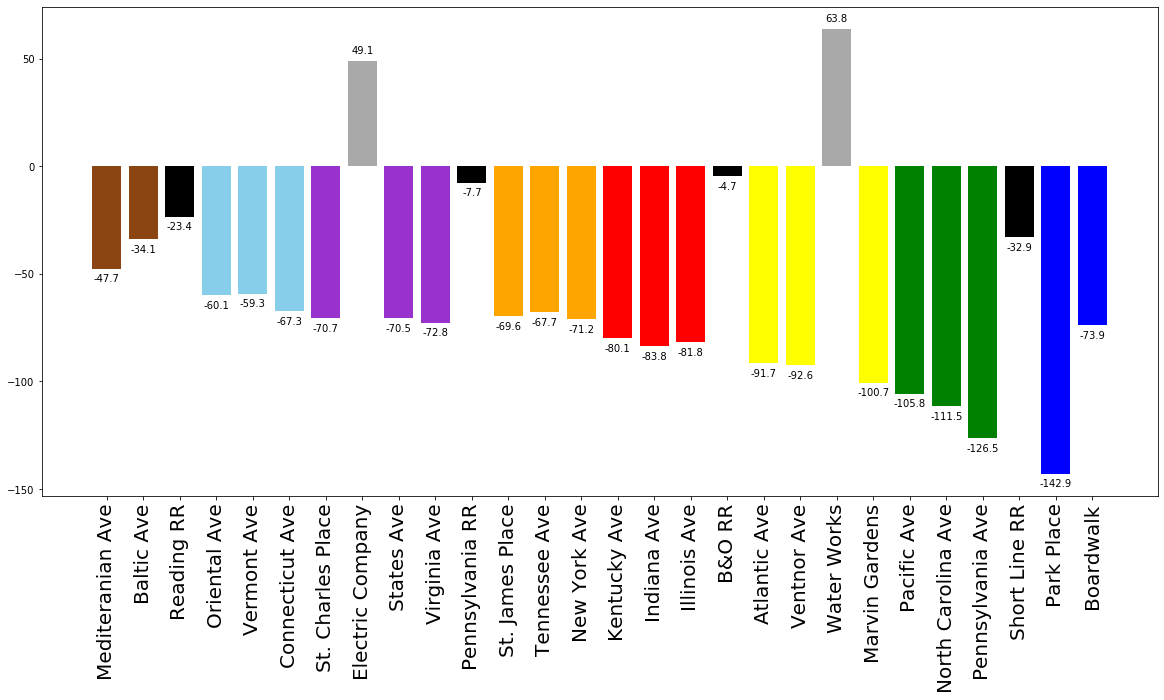

In [17]:
propertyColors = ['#8b4513','#8b4513','k','#87ceeb','#87ceeb','#87ceeb',
                  '#9932cc', '#A9A9A9','#9932cc','#9932cc','k','#FFA500','#FFA500','#FFA500',
                  '#FF0000','#FF0000','#FF0000','k','#FFFF00','#FFFF00','#A9A9A9','#FFFF00',
                  '#008000','#008000','#008000','k','#0000FF','#0000FF']


fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 9)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize= 20)
ax.bar(dfProperty['Name'],dfProperty['Spot Value'],color = propertyColors)

def add_value_labels(ax, spacing=5):
    """
    Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            float(label),               # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

In [19]:
# Create a new dataframe that includes only properties that you can buy houses/hotels on
buildingBool = [True,True,False,True,True,True,
               True,False,True,True,False,True,True,True,
               True,True,True,False,True,True,False,True,
               True,True,True,False,True,True]

dfProperty['Building'] = buildingBool
dfBuilding = dfProperty[dfProperty['Building']==True]

dfBuilding = dfBuilding.reset_index(drop=True)

display (dfBuilding)

,Name,Spot Lands,Percent Lands,Property,Purchase Cost,Rent,Spot Value,Building
0,Mediteranian Ave,8231,2.0917,True,-60,2.0,-47.6535,True
1,Baltic Ave,8649,2.1979,True,-60,4.0,-34.053,True
2,Oriental Ave,8873,2.2548,True,-100,6.0,-60.0715,True
3,Vermont Ave,9050,2.2998,True,-100,6.0,-59.275,True
4,Connecticut Ave,8777,2.2304,True,-120,8.0,-67.338,True
5,St. Charles Place,9234,2.3465,True,-140,10.0,-70.745,True
6,States Ave,9265,2.3544,True,-140,10.0,-70.5125,True
7,Virginia Ave,9691,2.4627,True,-160,12.0,-72.781,True
8,St. James Place,10517,2.6726,True,-180,14.0,-69.5715,True
9,Tennessee Ave,10694,2.7176,True,-180,14.0,-67.713,True


In [20]:
# Create a list of the cost for one house
oneHouse = [-50,-50,-50,-50,-50,
           -100,-100,-100,-100,-100,-100,
           -150,-150,-150,-150,-150,-150,
           -200,-200,-200,-200,-200]

# Create a list for the rent each land on a house
oneHouseRent = [10,20,30,30,40,
               50,50,60,70,70,80,
               90,90,100,110,110,120,
               130,130,150,175,200]

twoHouseRent = [30,60,90,90,100,
               150,150,180,200,200,220,
               250,250,300,330,330,360,
               390,390,450,500,600]

threeHouseRent = [90,180,270,270,300,
                 450,450,500,550,550,600,
                 700,700,750,800,800,850,
                 900,900,1000,1100,1400]

# Add houses to dfBuilding

dfBuilding['House Cost'] = oneHouse
dfBuilding['1 House Rent'] = oneHouseRent
dfBuilding['2 House Rent'] = twoHouseRent
dfBuilding['3 House Rent'] = threeHouseRent

display (dfBuilding)

,Name,Spot Lands,Percent Lands,Property,Purchase Cost,Rent,Spot Value,Building,House Cost,1 House Rent,2 House Rent,3 House Rent
0,Mediteranian Ave,8231,2.0917,True,-60,2.0,-47.6535,True,-50,10,30,90
1,Baltic Ave,8649,2.1979,True,-60,4.0,-34.053,True,-50,20,60,180
2,Oriental Ave,8873,2.2548,True,-100,6.0,-60.0715,True,-50,30,90,270
3,Vermont Ave,9050,2.2998,True,-100,6.0,-59.275,True,-50,30,90,270
4,Connecticut Ave,8777,2.2304,True,-120,8.0,-67.338,True,-50,40,100,300
5,St. Charles Place,9234,2.3465,True,-140,10.0,-70.745,True,-100,50,150,450
6,States Ave,9265,2.3544,True,-140,10.0,-70.5125,True,-100,50,150,450
7,Virginia Ave,9691,2.4627,True,-160,12.0,-72.781,True,-100,60,180,500
8,St. James Place,10517,2.6726,True,-180,14.0,-69.5715,True,-100,70,200,550
9,Tennessee Ave,10694,2.7176,True,-180,14.0,-67.713,True,-100,70,200,550


In [21]:
# How much game has to be left for you to break even on a building purchase
dfBuilding['1 House Break Even Lands'] = -(dfBuilding['House Cost']/dfBuilding['1 House Rent'])
dfBuilding['1 House Break Even Game Left'] = (dfBuilding['1 House Break Even Lands'] / (dfBuilding['Spot Lands']/gameNum))

dfBuilding['2 House Break Even Lands'] = -((dfBuilding['House Cost'] * 2)/dfBuilding['2 House Rent'])
dfBuilding['2 House Break Even Game Left'] = (dfBuilding['2 House Break Even Lands'] / (dfBuilding['Spot Lands']/gameNum))

dfBuilding['3 House Break Even Lands'] = -((dfBuilding['House Cost'] * 2)/dfBuilding['3 House Rent'])
dfBuilding['3 House Break Even Game Left'] = (dfBuilding['3 House Break Even Lands'] / (dfBuilding['Spot Lands']/gameNum))

display (dfBuilding)

,Name,Spot Lands,Percent Lands,Property,Purchase Cost,Rent,Spot Value,Building,House Cost,1 House Rent,2 House Rent,3 House Rent,1 House Break Even Lands,1 House Break Even Game Left,2 House Break Even Lands,2 House Break Even Game Left,3 House Break Even Lands,3 House Break Even Game Left
0,Mediteranian Ave,8231,2.0917,True,-60,2.0,-47.6535,True,-50,10,30,90,5.000000,0.60746,3.333333,0.404973,1.111111,0.134991
1,Baltic Ave,8649,2.1979,True,-60,4.0,-34.053,True,-50,20,60,180,2.500000,0.289051,1.666667,0.192701,0.555556,0.0642335
2,Oriental Ave,8873,2.2548,True,-100,6.0,-60.0715,True,-50,30,90,270,1.666667,0.187836,1.111111,0.125224,0.370370,0.0417413
3,Vermont Ave,9050,2.2998,True,-100,6.0,-59.275,True,-50,30,90,270,1.666667,0.184162,1.111111,0.122775,0.370370,0.0409249
4,Connecticut Ave,8777,2.2304,True,-120,8.0,-67.338,True,-50,40,100,300,1.250000,0.142418,1.000000,0.113934,0.333333,0.037978
5,St. Charles Place,9234,2.3465,True,-140,10.0,-70.745,True,-100,50,150,450,2.000000,0.216591,1.333333,0.144394,0.444444,0.0481313
6,States Ave,9265,2.3544,True,-140,10.0,-70.5125,True,-100,50,150,450,2.000000,0.215866,1.333333,0.143911,0.444444,0.0479703
7,Virginia Ave,9691,2.4627,True,-160,12.0,-72.781,True,-100,60,180,500,1.666667,0.171981,1.111111,0.114654,0.400000,0.0412754
8,St. James Place,10517,2.6726,True,-180,14.0,-69.5715,True,-100,70,200,550,1.428571,0.135834,1.000000,0.0950841,0.363636,0.0345761
9,Tennessee Ave,10694,2.7176,True,-180,14.0,-67.713,True,-100,70,200,550,1.428571,0.133586,1.000000,0.0935104,0.363636,0.0340038


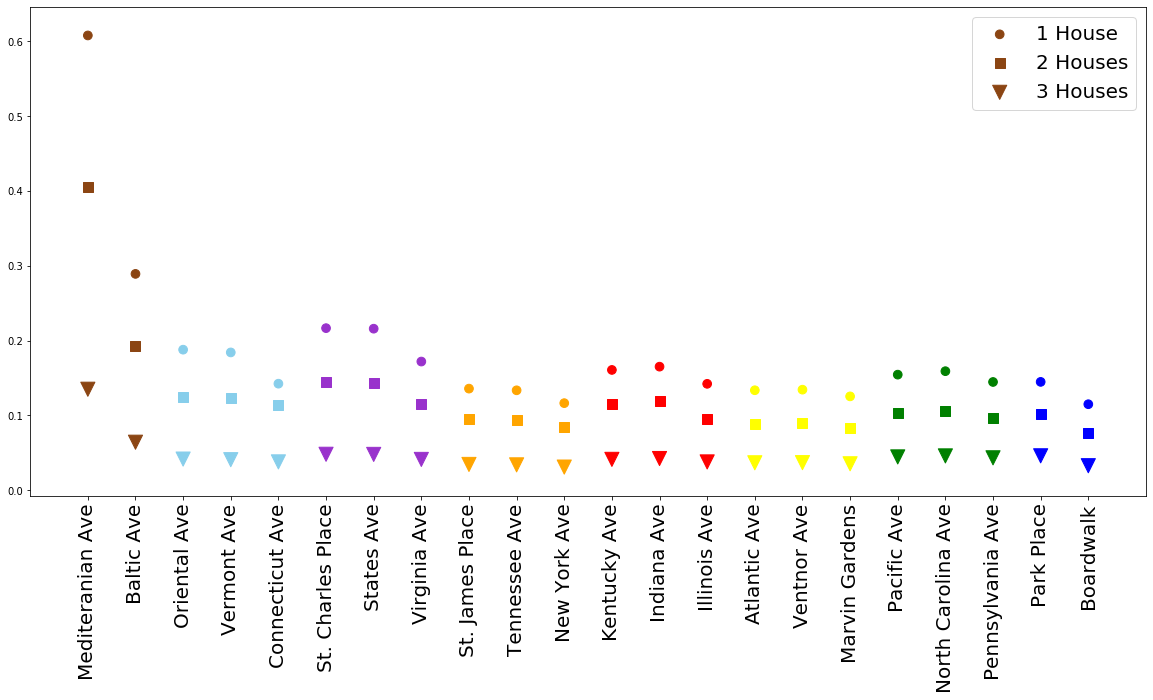

In [22]:
buildingColors = ['#8b4513','#8b4513','#87ceeb','#87ceeb','#87ceeb',
                  '#9932cc','#9932cc','#9932cc','#FFA500','#FFA500','#FFA500',
                  '#FF0000','#FF0000','#FF0000','#FFFF00','#FFFF00','#FFFF00',
                  '#008000','#008000','#008000','#0000FF','#0000FF']


fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 9)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize= 20)
ax.scatter(dfBuilding['Name'], dfBuilding['1 House Break Even Game Left'], color = buildingColors, marker = ".", s=300, label = "1 House")
ax.scatter(dfBuilding['Name'], dfBuilding['2 House Break Even Game Left'], color = buildingColors, marker = "s", s=100, label = "2 Hosues")
ax.scatter(dfBuilding['Name'], dfBuilding['3 House Break Even Game Left'], color = buildingColors, marker = "v", s=200, label = "3 Houses")

ax.legend(['1 House', '2 Houses', '3 Houses'], fontsize = 20)

In [24]:
dfBuildingNew = dfBuilding.drop([0 , 1])

dfBuildingNew = dfBuildingNew.reset_index(drop=True)

display (dfBuildingNew)

,Name,Spot Lands,Percent Lands,Property,Purchase Cost,Rent,Spot Value,Building,House Cost,1 House Rent,2 House Rent,3 House Rent,1 House Break Even Lands,1 House Break Even Game Left,2 House Break Even Lands,2 House Break Even Game Left,3 House Break Even Lands,3 House Break Even Game Left
0,Oriental Ave,8873,2.2548,True,-100,6.0,-60.0715,True,-50,30,90,270,1.666667,0.187836,1.111111,0.125224,0.370370,0.0417413
1,Vermont Ave,9050,2.2998,True,-100,6.0,-59.275,True,-50,30,90,270,1.666667,0.184162,1.111111,0.122775,0.370370,0.0409249
2,Connecticut Ave,8777,2.2304,True,-120,8.0,-67.338,True,-50,40,100,300,1.250000,0.142418,1.000000,0.113934,0.333333,0.037978
3,St. Charles Place,9234,2.3465,True,-140,10.0,-70.745,True,-100,50,150,450,2.000000,0.216591,1.333333,0.144394,0.444444,0.0481313
4,States Ave,9265,2.3544,True,-140,10.0,-70.5125,True,-100,50,150,450,2.000000,0.215866,1.333333,0.143911,0.444444,0.0479703
5,Virginia Ave,9691,2.4627,True,-160,12.0,-72.781,True,-100,60,180,500,1.666667,0.171981,1.111111,0.114654,0.400000,0.0412754
6,St. James Place,10517,2.6726,True,-180,14.0,-69.5715,True,-100,70,200,550,1.428571,0.135834,1.000000,0.0950841,0.363636,0.0345761
7,Tennessee Ave,10694,2.7176,True,-180,14.0,-67.713,True,-100,70,200,550,1.428571,0.133586,1.000000,0.0935104,0.363636,0.0340038
8,New York Ave,10736,2.7282,True,-200,16.0,-71.168,True,-100,80,220,600,1.250000,0.116431,0.909091,0.0846769,0.333333,0.0310482
9,Kentucky Ave,10366,2.6342,True,-220,18.0,-80.059,True,-150,90,250,700,1.666667,0.160782,1.200000,0.115763,0.428571,0.041344


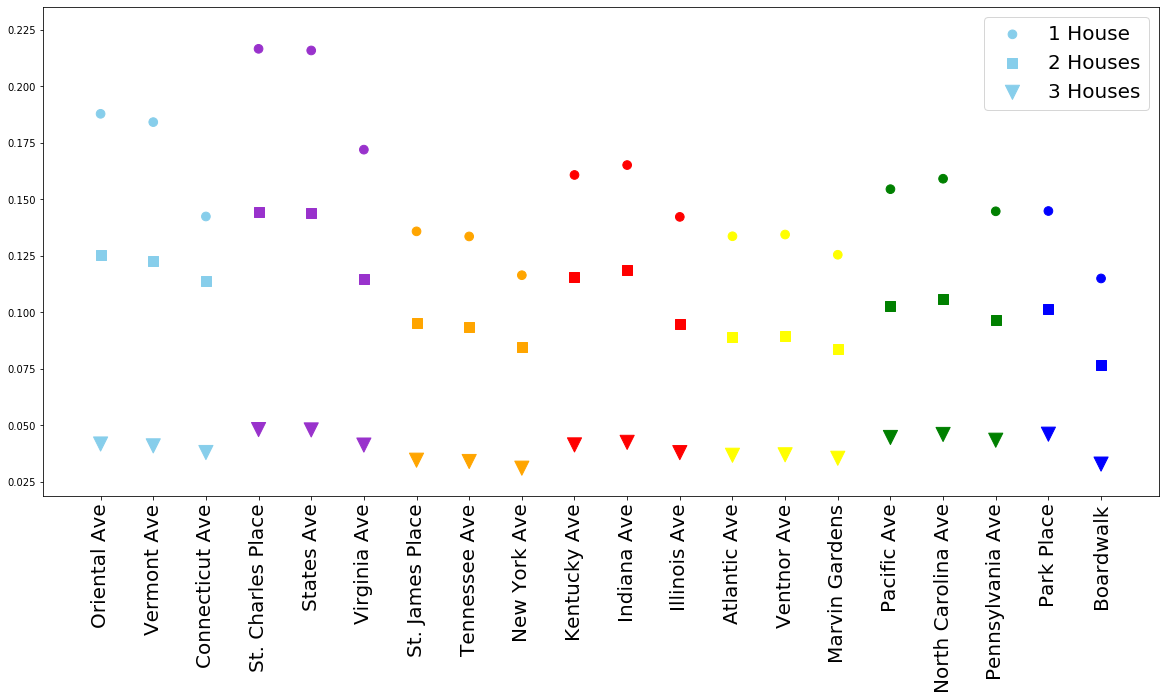

In [25]:
buildingColorsNew = ['#87ceeb','#87ceeb','#87ceeb',
                  '#9932cc','#9932cc','#9932cc','#FFA500','#FFA500','#FFA500',
                  '#FF0000','#FF0000','#FF0000','#FFFF00','#FFFF00','#FFFF00',
                  '#008000','#008000','#008000','#0000FF','#0000FF']

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 9)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize= 20)
ax.scatter(dfBuildingNew['Name'], dfBuildingNew['1 House Break Even Game Left'], color = buildingColorsNew, marker = ".", s=300, label = "1 House")
ax.scatter(dfBuildingNew['Name'], dfBuildingNew['2 House Break Even Game Left'], color = buildingColorsNew, marker = "s", s=100, label = "2 Hosues")
ax.scatter(dfBuildingNew['Name'], dfBuildingNew['3 House Break Even Game Left'], color = buildingColorsNew, marker = "v", s=200, label = "3 Houses")

ax.legend(['1 House', '2 Houses', '3 Houses'], fontsize = 20)